In [275]:
import numpy as np
from matplotlib import pyplot as plt

In [331]:
hx = 0.1
hy = 0.1
xmax = 1
ymax = 1.5

In [333]:
x = np.arange(-xmax, xmax + hx, hx)
y = np.arange(-ymax, ymax + hy, hy)

X, Y = np.meshgrid(x, y)

N = len(x)
M = len(y)

In [335]:
t0 = 0
tmax = 5
ht = 0.001

In [337]:
t = np.arange(t0, tmax + ht, ht)

In [339]:
T = len(t)

In [341]:
def diff_m(n, h):
    return (np.diag(np.ones(n - 1), -1) + np.diag(np.ones(n - 1), 1) + np.diag(-2*np.ones(n)))/(h**2)

In [343]:
def lapl(dx, dy, n, m):

    return np.kron(dx, np.identity(m)) + np.kron(np.identity(n), dy)

In [345]:
Dx = diff_m(N, hx)
Dy = diff_m(M, hy)

L = lapl(Dx, Dy, N, M)

In [347]:
U = np.empty(shape = (T,M,N))

In [349]:
U[0, :, :] = np.exp(-X**2 - Y**2)
U[0, 0, :] = 0
U[0, -1, :] = 0 
U[0, :, 0] = 0
U[0, :, -1] = 0

In [351]:
# dirichlet

for step in range(1, T):

    u = U[step - 1, :, :].flatten()
    v = np.matmul(L, u)
    U[step, :, :] = U[step - 1, :, :] + v.reshape(M, N)*ht
    U[step, 0, :] = 0
    U[step, -1, :] = 0 
    U[step, :, 0] = 0
    U[step, :, -1] = 0

In [38]:
# for i in range(0, 100, 10):
#     plt.imshow(U[i, :, :], extent=(-xmax, xmax, -ymax, ymax), origin='lower', cmap='viridis')
#     plt.colorbar(label="exp(x + y)")
#     plt.show()

In [205]:
# neumann

for step in range(1, T):

    u = U[step - 1, :, :].flatten()
    v = np.matmul(L, u)
    U[step, :, :] = U[step - 1, :, :] + v.reshape(M, N)*ht
    U[step, 0, :] = U[step, 1, :]
    U[step, -1, :] = U[step, -2, :]
    U[step, :, 0] = U[step, :, 1]
    U[step, :, -1] = U[step, :, -2]

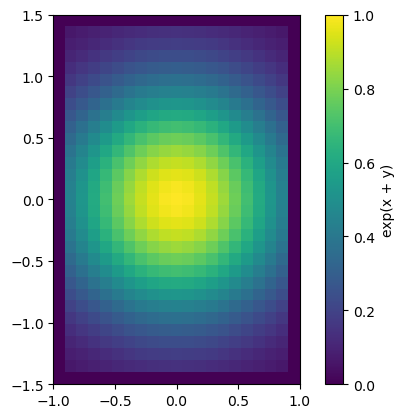

In [353]:
plt.imshow(U[0, :, :], extent=(-xmax, xmax, -ymax, ymax), origin='lower', cmap='viridis')
plt.colorbar(label="exp(x + y)")
plt.show()

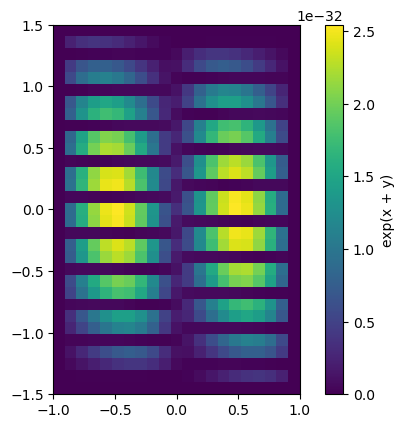

In [355]:
plt.imshow(U[-1, :, :], extent=(-xmax, xmax, -ymax, ymax), origin='lower', cmap='viridis')
plt.colorbar(label="exp(x + y)")
plt.show()